
# Partie I - Exploration de l'ensemble de données du système Ford GoBike

## Par Patrick Essonani AWIH

## Tables des matières

<ul>
<li><a href="#wrangle">Introduction</a></li>
<li><a href="#uni">I. Les premières Explorations</a></li>
<li><a href="#bi">II. Exploration Univariée</a></li>
<li><a href="#mult">III. Exploration Bivariée</a></li> 
<li><a href="#next">IV. Exploration Multivariée</a></li>
<li><a href="#ref">V. Conclusions</a></li>    
</ul>


<a id='wrangle'></a>
## Introduction
> Dans la présente partie de notre projet, nous voulons explorer l'ensemble de données du système Ford GoBike qui comprend des informations sur les trajets individuels effectués dans un système de vélos libre service couvrant la grande région de la baie de San Francisco du 28 fevrier 2019 à 1er Mars 2019.
<a id='uni'></a>
## Les premières Explorations


In [1]:
# importation de tous les bibliothèque nécessaire à l'analyse exploratoire
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time
%matplotlib inline

In [2]:
#Chargement de notre jeu de données 
df = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
#affichage des dimensions de la base
df.shape

(183412, 16)

In [4]:
#Affichage des 10 premières lignes
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [5]:
#affichages des information sur les variables de la base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#les valeur uniques
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [7]:
#les valeur uniques de la variables start_station_name
df.start_station_name.value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [8]:
#Affichage des valeurs dupliquées
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

'start_station_id'

In [9]:
#Suppression des conlonnes qui ne vont pas nous servire dans l'analyse
df.drop(columns=['start_station_latitude','start_station_longitude',
                 'end_station_id', 'end_station_latitude','end_station_longitude','bike_id'], inplace = True)

In [10]:
#Conversion de la variable 'start_time' decaine de charactère en datetime
df['start_time'] = pd.to_datetime(df['start_time'] )

In [11]:
#Conversion de la variable 'end_time' de chaine de charactère en datetime
df['end_time'] = pd.to_datetime(df['end_time'] )

In [12]:
 # extraction de l'heure de départ et la période du jour des trajets
df['debut_heure'] = df['start_time'].apply(lambda time: time.hour)
df['période_jour'] = 'matin'
df['période_jour'][(df['debut_heure'] >= 12) & (df['debut_heure'] <= 17)] = 'Après midi'
df['période_jour'][(df['debut_heure'] >= 18) & (df['debut_heure'] <= 23)] = 'nuit'

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14396\667754585.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['période_jour'][(df['debut_heure'] >= 12) & (df['debut_heure'] <= 17)] = 'Après midi'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14396\667754585.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['période_jour'][(df['debut_heure'] >= 18) & (df['debut_heure'] <= 23)] = 'nuit'


In [13]:
# affichage de l'heur de debut et la période du jour
print(df['debut_heure'].value_counts())
print(df['période_jour'].value_counts())

17    21864
8     21056
18    16827
9     15903
16    14169
7     10614
19     9881
15     9174
12     8724
13     8551
10     8364
14     8152
11     7884
20     6482
21     4561
6      3485
22     2916
23     1646
0       925
5       896
1       548
2       381
4       235
3       174
Name: debut_heure, dtype: int64
Après midi    70634
matin         70465
nuit          42313
Name: période_jour, dtype: int64


In [14]:
# Extraction des jours de la semaine
df['debut_semaine_num'] = df['start_time'].apply(lambda time: time.dayofweek)
dmap = {0:'Lundi',1:'Mardi',2:'Mercredi',3:'Jeudi',4:'Vendredi',5:'Samedi',6:'Dimanche'}
df['debut_semaine_char'] = df['debut_semaine_num'].map(dmap)

In [15]:
# Visualisation des jours de la semaine
print(df['debut_semaine_num'].value_counts())
print(df['debut_semaine_char'].value_counts())

3    35197
1    31813
2    29641
4    28981
0    26852
6    15523
5    15405
Name: debut_semaine_num, dtype: int64
Jeudi       35197
Mardi       31813
Mercredi    29641
Vendredi    28981
Lundi       26852
Dimanche    15523
Samedi      15405
Name: debut_semaine_char, dtype: int64


In [16]:
# convertion de la période du jour et des jours de la semaines en varibles catégorielles ordinanles
Mon_dictionnaire = {'période_jour': ['matin', 'Après midi', 'nnuit'],
                    'debut_semaine_char': ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']}

for var in Mon_dictionnaire:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = Mon_dictionnaire[var])
    df[var] = df[var].astype(ordered_var)

In [17]:
# Créons les ages
df['age'] = df['member_birth_year'].apply(lambda x: 2019 - x)

In [18]:
# Statistiques descriptives de la variable age
df['age'].describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

In [19]:
#Affiche des informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   end_station_name         183215 non-null  object        
 6   user_type                183412 non-null  object        
 7   member_birth_year        175147 non-null  float64       
 8   member_gender            175147 non-null  object        
 9   bike_share_for_all_trip  183412 non-null  object        
 10  debut_heure              183412 non-null  int64         
 11  période_jour             141099 non-null  category      
 12  debut_semaine_nu

In [20]:
df.dropna(how='any', inplace=True)

In [21]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,debut_heure,période_jour,debut_semaine_num,debut_semaine_char,age
3435,382,2019-02-28 17:17:05.930,2019-02-28 17:23:28.872,99.0,Folsom St at 15th St,20th St at Bryant St,Subscriber,1988.0,Female,Yes,17,Après midi,3,Jeudi,31.0
29031,580,2019-02-25 07:59:03.058,2019-02-25 08:08:43.179,61.0,Howard St at 8th St,Townsend St at 5th St,Customer,1980.0,Male,No,7,matin,0,Lundi,39.0
64252,68,2019-02-20 12:41:04.724,2019-02-20 12:42:13.052,58.0,Market St at 10th St,Market St at 10th St,Subscriber,2000.0,Male,No,12,Après midi,2,Mercredi,19.0
113929,564,2019-02-12 10:27:10.700,2019-02-12 10:36:35.171,355.0,23rd St at Tennessee St,4th St at Mission Bay Blvd S,Subscriber,1985.0,Male,No,10,matin,1,Mardi,34.0
101510,1852,2019-02-14 17:04:38.398,2019-02-14 17:35:31.256,59.0,S Van Ness Ave at Market St,Webster St at Grove St,Subscriber,1983.0,Male,Yes,17,Après midi,3,Jeudi,36.0
65195,1451,2019-02-20 09:40:55.456,2019-02-20 10:05:07.399,6.0,The Embarcadero at Sansome St,Folsom St at 9th St,Subscriber,1988.0,Male,No,9,matin,2,Mercredi,31.0
44149,387,2019-02-22 15:25:49.447,2019-02-22 15:32:16.505,323.0,Broadway at Kearny,Union Square (Powell St at Post St),Subscriber,1947.0,Male,Yes,15,Après midi,4,Vendredi,72.0
84586,2178,2019-02-17 16:46:10.473,2019-02-17 17:22:28.943,236.0,Market St at 8th St,Lakeside Dr at 14th St,Subscriber,1976.0,Male,No,16,Après midi,6,Dimanche,43.0
135008,346,2019-02-08 16:09:40.016,2019-02-08 16:15:26.253,7.0,Frank H Ogawa Plaza,2nd Ave at E 18th St,Subscriber,1977.0,Male,No,16,Après midi,4,Vendredi,42.0
102192,345,2019-02-14 16:51:14.189,2019-02-14 16:56:59.307,6.0,The Embarcadero at Sansome St,Steuart St at Market St,Subscriber,1967.0,Male,No,16,Après midi,3,Jeudi,52.0


In [22]:
#Stataistiques descriptives de la base de données
df.describe()

,duration_sec,start_station_id,member_birth_year,debut_heure,debut_semaine_num,age
count,134434.000000,134434.000000,134434.000000,134434.000000,134434.000000,134434.000000
mean,714.751625,137.494168,1984.324263,11.684403,2.647388,34.675737
std,1611.048982,111.874115,10.324453,3.870003,1.823879,10.324453
min,61.000000,3.000000,1878.000000,0.000000,0.000000,18.000000
25%,329.000000,44.000000,1980.000000,8.000000,1.000000,27.000000
50%,519.000000,101.000000,1987.000000,11.000000,3.000000,32.000000
75%,800.000000,238.000000,1992.000000,16.000000,4.000000,39.000000
max,84548.000000,398.000000,2001.000000,17.000000,6.000000,141.000000


In [23]:
#Dimenssion de la base
df.shape

(134434, 15)

### Quelle est la structure de votre ensemble de données?

##### Notre ensemble de données contient un totale de 183412 lignes et 16 variables qui sont décrit dans le tableau ci-dessous 

 <table>

<tr>    <td> Variables </td>                   <td> Type de variables<td>   </tr>                

  <tr>   <td>  duration_sec </td>                  <td> int64 </td> </tr>                  
 <tr>   <td>start_time </td>	          <td> string  </td> </tr>            
  <tr> <td> end_time </td>        <td> string </td> </tr>                                
  <tr> <td>  start_station_id  </td>            <td>  float64 </td>  </tr>                  
 <tr>  <td> start_station_name  </td>            <td> string </td> </tr>                           
 <tr>  <td> start_station_latitude  </td>          <td> float64 </td> </tr>                   	               
 <tr>  <td>  start_station_longitude   </td>             <td>float64  </td> </tr>       
 <tr>  <td>    end_station_id </td>           <td> float64  </td>  </tr>                   
 <tr>  <td>    end_station_name  </td>           <td> string  </td>  </tr>                 
 <tr>   <td>   end_station_latitude  </td>           <td> float64 </td> </tr> 
 <tr>    <td> end_station_longitude </td>          <td>  float64 </td>  </tr>                            
 <tr>   <td>  bike_id   </td>          <td>  int64 </td>  </tr>                   
  <tr>   <td>  user_type  </td>          <td>  string  </td> </tr>                 
  <tr>    <td> member_birth_year	</td>          <td>  float64 </td> </tr>                            
<tr>  <td> member_gender </td>    <td>  string </td> </tr>         
  <tr>   <td> bike_share_for_all_trip  </td>       <td> string  </td>  </tr>            
    
</table>
                                 
- Selons nos premières explorations, les variables "start_time" et "end_time" sont en chaines de charactères alors qu'elles devrait être temps de date donc nous devons convertir ces variables en type temps.

- Nous voyons egalement que dans ces même variables, on a regouppé l'année, le mois, le jour, et l'heure. Nous pouvons séparer ces données en différentes variables.

- L’ensemble de données fournit l’année de naissance des membres, de sorte que les âges peuvent être dérivés en utilisant l’année de l’ensemble de données, 2019, pour diviser par l’année de naissance des membres 

### Quelles sont les principales caractéristiques d’intérêt de votre ensemble de données?

- Je suis plus intéressé à déterminer quand et où la plupart des voyages sont effectués, car cet ensemble de données comprend l’heure / lieu de début et l’heure / lieu de fin. Je me concentre d’abord sur les points de départ.

- Aussi, je m’intéresse aux caractéristiques (âge, sexe et type d'utilisateurs) des coureurs et à la durée des trajets dans ces points temporels et lieux.

### Selon vous, quelles caractéristiques de l’ensemble de données vous aideront à mener votre enquête sur vos caractéristiques d’intérêt?

> Je m’attends à ce que les stations situées au centre de la ville de San Francisco aient plus de voyages que d’autres endroits parce que ces stations se connectent à d’autres transports majeurs.

> Je pense que  le matin et l’après-midi auront plus de voyages que la nuit en raison des heures de pointe.

> De plus, je suppose que les jeunes cavaliers sont plus que les cavaliers plus âgés en raison de leurs capacités physiques.

> En outre, sur la base des prix, les abonnés sont plus susceptibles de rouler plus que les clients. Et il est difficile de s’attendre à ce que les cavalières soient plus ou des hommes, alors je laisse ce sujet dans l’analyse. 

<a id='bi'></a>
##  Exploration Univariée

> Dans cette section, nous allons étudier les distributions de variables individuelles. On va aussi examinier plus en profondeur les valeurs aberrantes si il y en a.

> **Question 1**: Quand la plupart des voyages sont-ils effectués en termes d’heure de la journée, de jour de la semaine ou de mois de l’année?

> Nous allons commencer par le temps de la journée et les jour de la semaine durant leuquelles la plus part des voyage de sont éffectuées 

In [24]:
# 1) quelles sont les heures auquelles les voyages sont le plus éffectuées ?
df['debut_heure'].value_counts()

17    20904
8     20227
9     15204
16    13473
7     10231
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
6      3293
0       893
5       866
1       525
2       355
4       227
3       164
Name: debut_heure, dtype: int64

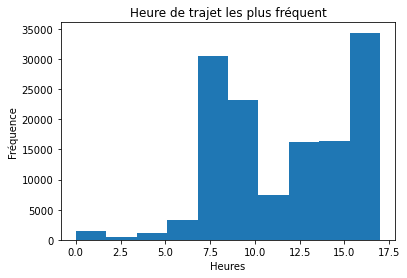

In [25]:
#Histogramme de fréquence sur les heures de trajets
df['debut_heure'].plot(kind = 'hist')
plt.title ('Heure de trajet les plus fréquent')
plt.xlabel ('Heures')
plt.ylabel ('Fréquence')
plt.show ()

**Commentaire**: On vois de part ce graphique que la majeure partie des trajets sont effectuées 8h et 9h le matin et 16h et 17h le soir, cela peut s'expliquer du fait que ces heures soient des heures de pointes pans lesquels les gens vont au travail ou retourne du boulot.

In [26]:
# 2) quelles sont les périodes de la journée auquelles les voyages sont le plus éffectuées ?
df['période_jour'].value_counts()

matin         67416
Après midi    67018
nnuit             0
Name: période_jour, dtype: int64

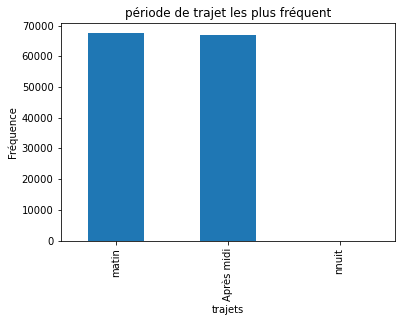

In [27]:
#Histogramme de fréquence sur les périodes de trajets les plus fréquents 
df['période_jour'].value_counts().plot(kind = 'bar')
plt.title ('période de trajet les plus fréquent')
plt.xlabel ('trajets')
plt.ylabel ('Fréquence')
plt.show ()

**Commentaire**: On vois clairement que sa soit les matin ou les après midi les trajets sont plus ou moins fréquents. 
    On peur aussi remaquer que dans notre base de donnée il n'y a aucun trajet la nuit

In [28]:
# 3) quelles sont les jours de la semaine dans lesquelles les voyages sont le plus éffectuées ?
df['debut_semaine_char'].value_counts()

Jeudi       25036
Mardi       23481
Vendredi    22317
Mercredi    20830
Lundi       19770
Samedi      11618
Dimanche    11382
Name: debut_semaine_char, dtype: int64

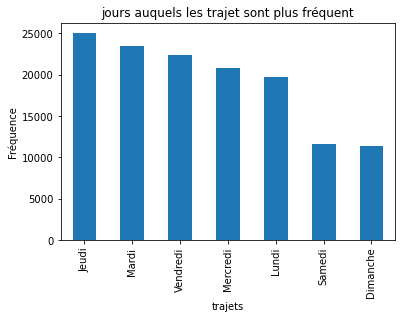

In [29]:
df['debut_semaine_char'].value_counts().plot(kind = 'bar')
plt.title ('jours auquels les trajet sont plus fréquent')
plt.xlabel ('trajets')
plt.ylabel ('Fréquence')
plt.show ()

**Commentaire**: On vois que les jour ou les trajets sont le plus fréquents sont le Jeudi, Mardi, Vendredi, et Mercredi.

> **Question 2**: Combien de temps dure le trajet moyen?

In [30]:
# Durée de trajets 
df['duration_sec'].describe()

count    134434.000000
mean        714.751625
std        1611.048982
min          61.000000
25%         329.000000
50%         519.000000
75%         800.000000
max       84548.000000
Name: duration_sec, dtype: float64

**Commentaires**: Ces statistiques nous montrent que la durée minimum d'un trajet est d'environ 1 minute, moyenement un trajet dure 12 minutes, la durée maximum d'un trajet est d'environ 1409 minutes soit environ 23h.

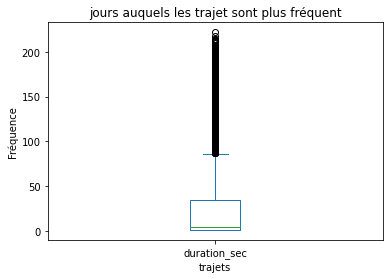

In [31]:
#Boite à moustache sur la durée des trajets
df['duration_sec'].value_counts().plot(kind = 'box')
plt.title ('jours auquels les trajet sont plus fréquent')
plt.xlabel ('trajets')
plt.ylabel ('Fréquence')
plt.show ()

> On voit à travert ce graphique il y a certains trajets qui sortent de l'ordinaire

In [32]:
#On remarque que on a 329 station de départs 
print(len(df['start_station_name'].value_counts()))
df['start_station_name'].value_counts()

329


Market St at 10th St                                         2825
San Francisco Caltrain Station 2  (Townsend St at 4th St)    2556
Berry St at 4th St                                           2450
San Francisco Ferry Building (Harry Bridges Plaza)           2129
Montgomery St BART Station (Market St at 2nd St)             2127
                                                             ... 
Parker Ave at McAllister St                                     5
Farnam St at Fruitvale Ave                                      3
16th St Depot                                                   2
Palm St at Willow St                                            2
21st Ave at International Blvd                                  2
Name: start_station_name, Length: 329, dtype: int64

In [33]:
#On remarque que on a 329 station d'arrivée
print(len(df['end_station_name'].value_counts()))
df['end_station_name'].value_counts()

329


San Francisco Caltrain Station 2  (Townsend St at 4th St)    3805
Montgomery St BART Station (Market St at 2nd St)             3099
Market St at 10th St                                         2764
San Francisco Ferry Building (Harry Bridges Plaza)           2754
San Francisco Caltrain (Townsend St at 4th St)               2486
                                                             ... 
Taylor St at 9th St                                             6
16th St Depot                                                   6
Willow St at Vine St                                            4
21st Ave at International Blvd                                  4
Parker Ave at McAllister St                                     2
Name: end_station_name, Length: 329, dtype: int64

**Commentaire**: On a 329 stations de départ et 329 stations d'arrivée. Nous pouvons identifier 8 stations de départs et d'arrivée sur lesquelles les trajets sont leplus effectuées.

In [34]:
#  identification de 8 stations de départs sur lesquelles les trajets sont leplus effectuées.
dep_Stations = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','Berry St at 4th St','Powell St BART Station (Market St at 4th St)']
df_top8 = df.loc[df['start_station_name'].isin(dep_Stations)]

In [35]:
# Compte de l'ensemble de ses stations
df_top8['start_station_name'].value_counts()

Market St at 10th St                                         2825
San Francisco Caltrain Station 2  (Townsend St at 4th St)    2556
Berry St at 4th St                                           2450
San Francisco Ferry Building (Harry Bridges Plaza)           2129
Montgomery St BART Station (Market St at 2nd St)             2127
San Francisco Caltrain (Townsend St at 4th St)               2050
Powell St BART Station (Market St at 4th St)                 1867
The Embarcadero at Sansome St                                1604
Name: start_station_name, dtype: int64

In [36]:
# Après avoir sous-défini les top 8 des stations avec le plus de trajets, nous allons tracer un diagramme en bâton pour voir la distribution 
# et l’ordre du top 1 au top 8
dep_stat_counts = df_top8['start_station_name'].value_counts()
dep_stat_ordre = dep_stat_counts.index

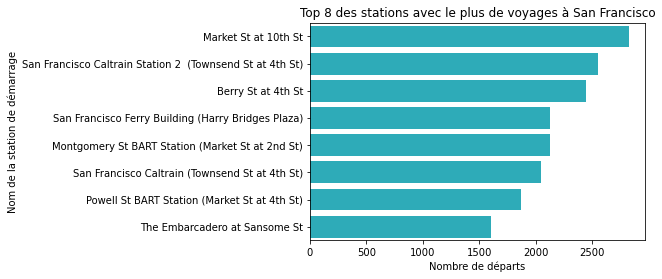

In [37]:
#  diagramme en bâton des top 8 des stations 
base_color = sb.color_palette()[9]
sb.countplot(data=df_top8, y='start_station_name', color=base_color, order=dep_stat_ordre)
plt.xlabel('Nombre de départs')
plt.ylabel('Nom de la station de démarrage')
plt.title('Top 8 des stations avec le plus de voyages à San Francisco');

**Commenataire**: Ce graphe nous montre que la station "Market St at 10th St" occupe la prmière place de notre classement et la station "The Embarcadero at Sansome St" occupe la dernière place de notre classement.

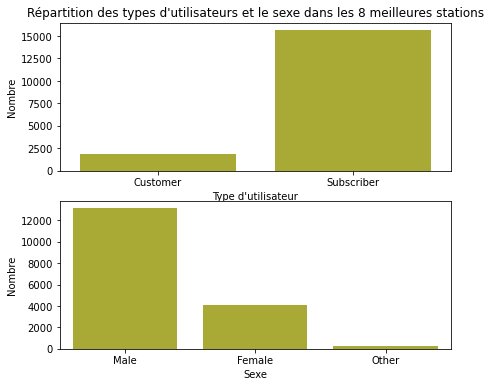

In [38]:
# Répartition des types d'utilisateurs selon le sexe dans les 8 meilleures stations
fig, ax = plt.subplots(nrows=2, figsize = [7,6])
default_color = sb.color_palette()[8]
sb.countplot(data = df_top8, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = df_top8, x = 'member_gender', color = default_color, ax = ax[1])
ax[0].set_xlabel('Type d\'utilisateur')
ax[0].set_ylabel('Nombre')
ax[1].set_xlabel('Sexe')
ax[1].set_ylabel('Nombre')
ax[0].set_title('Répartition des types d\'utilisateurs et le sexe dans les 8 meilleures stations');

**Commentaire**: On vois que il y a plus d'abonnés que de client et que le sexe qui effectue le plus de trajets est le sexe masculin 

In [39]:
# Vérification des autre type de sexe
df_top8.query('member_gender == "Other"')

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,debut_heure,période_jour,debut_semaine_num,debut_semaine_char,age
2191,1800,2019-02-28 17:57:04.259,2019-02-28 18:27:04.800,67.0,San Francisco Caltrain Station 2 (Townsend St...,Mission Dolores Park,Subscriber,1983.0,Other,No,17,Après midi,3,Jeudi,36.0
2443,1081,2019-02-28 17:55:14.098,2019-02-28 18:13:15.208,6.0,The Embarcadero at Sansome St,San Francisco Caltrain (Townsend St at 4th St),Customer,1984.0,Other,No,17,Après midi,3,Jeudi,35.0
2931,328,2019-02-28 17:45:09.821,2019-02-28 17:50:38.526,67.0,San Francisco Caltrain Station 2 (Townsend St...,8th St at Brannan St,Subscriber,1988.0,Other,No,17,Après midi,3,Jeudi,31.0
3623,325,2019-02-28 17:07:48.812,2019-02-28 17:13:14.049,21.0,Montgomery St BART Station (Market St at 2nd St),Father Alfred E Boeddeker Park,Subscriber,1991.0,Other,No,17,Après midi,3,Jeudi,28.0
3946,690,2019-02-28 16:39:37.462,2019-02-28 16:51:07.546,58.0,Market St at 10th St,Precita Park,Subscriber,1974.0,Other,No,16,Après midi,3,Jeudi,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179538,518,2019-02-01 13:30:35.339,2019-02-01 13:39:13.576,21.0,Montgomery St BART Station (Market St at 2nd St),Market St at 10th St,Subscriber,1988.0,Other,No,13,Après midi,4,Vendredi,31.0
179849,324,2019-02-01 12:44:28.223,2019-02-01 12:49:52.719,3.0,Powell St BART Station (Market St at 4th St),5th St at Folsom,Subscriber,1981.0,Other,No,12,Après midi,4,Vendredi,38.0
180075,499,2019-02-01 12:05:01.631,2019-02-01 12:13:20.636,3.0,Powell St BART Station (Market St at 4th St),Market St at 10th St,Customer,1989.0,Other,No,12,Après midi,4,Vendredi,30.0
180249,1260,2019-02-01 11:24:29.535,2019-02-01 11:45:30.398,3.0,Powell St BART Station (Market St at 4th St),Beale St at Harrison St,Subscriber,1974.0,Other,Yes,11,matin,4,Vendredi,45.0


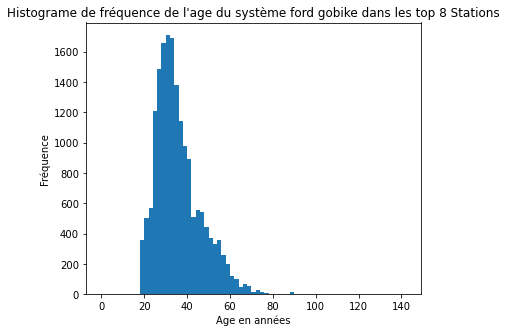

In [40]:
# Histograme de fréquence de l'age du système ford gobike dans les top 8 Stations
plt.figure(figsize=(6,5))
bins = np.arange(0, df_top8['age'].max()+2, 2)
plt.hist(data=df_top8, x='age', bins=bins)
plt.xlabel('Age en années')
plt.ylabel('Fréquence')
plt.title('Histograme de fréquence de l\'age du système ford gobike dans les top 8 Stations');

**Commentaire**: On vois que ce sont les tranches d'ages compris entre [20-40] et celles comprises entre [41-60] qui font le plus des voyages.

In [41]:
#Statistiques descriptives sur l'age
df_top8['age'].describe()

count    17608.000000
mean        35.363982
std         10.602855
min         18.000000
25%         28.000000
50%         33.000000
75%         41.000000
max        141.000000
Name: age, dtype: float64

**Commentaire**: L'age minimum des riders est de 18 ans celle moyenne est de 35 ans et celle maximale est de 141 ans

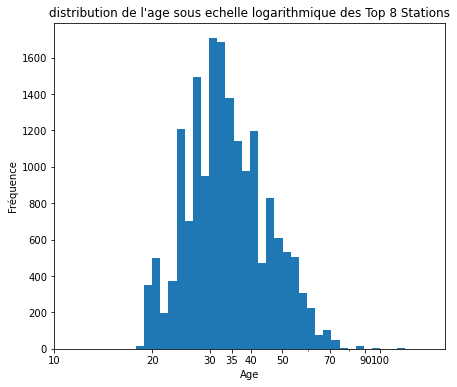

In [42]:
# On remarque plus haut qu'il y'a une longue traine dans la distribution donc metton sous echelle avec logarithme
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(df_top8['age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[7, 6])
plt.hist(data = df_top8, x = 'age', bins = bins)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100])
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.title('distribution de l\'age sous echelle logarithmique des Top 8 Stations');

In [43]:
# verification des ages supérieur à 100 ans
df_top8.query('age > 100')

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,debut_heure,période_jour,debut_semaine_num,debut_semaine_char,age
21506,701,2019-02-26 09:06:11.239,2019-02-26 09:17:52.442,67.0,San Francisco Caltrain Station 2 (Townsend St...,Broadway at Battery St,Customer,1900.0,Male,No,9,matin,1,Mardi,119.0
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15.0,San Francisco Ferry Building (Harry Bridges Pl...,24th St at Bartlett St,Customer,1878.0,Female,No,9,matin,0,Lundi,141.0
97997,418,2019-02-15 08:23:25.306,2019-02-15 08:30:24.132,67.0,San Francisco Caltrain Station 2 (Townsend St...,1st St at Folsom St,Subscriber,1902.0,Female,No,8,matin,4,Vendredi,117.0
114762,543,2019-02-12 09:12:25.266,2019-02-12 09:21:28.581,30.0,San Francisco Caltrain (Townsend St at 4th St),1st St at Folsom St,Subscriber,1902.0,Female,No,9,matin,1,Mardi,117.0
123240,562,2019-02-11 09:36:13.876,2019-02-11 09:45:36.806,30.0,San Francisco Caltrain (Townsend St at 4th St),1st St at Folsom St,Subscriber,1902.0,Female,No,9,matin,0,Lundi,117.0
137804,372,2019-02-08 08:22:24.741,2019-02-08 08:28:37.126,30.0,San Francisco Caltrain (Townsend St at 4th St),1st St at Folsom St,Subscriber,1902.0,Female,No,8,matin,4,Vendredi,117.0
145510,508,2019-02-07 09:34:11.542,2019-02-07 09:42:40.400,30.0,San Francisco Caltrain (Townsend St at 4th St),1st St at Folsom St,Subscriber,1902.0,Female,No,9,matin,3,Jeudi,117.0


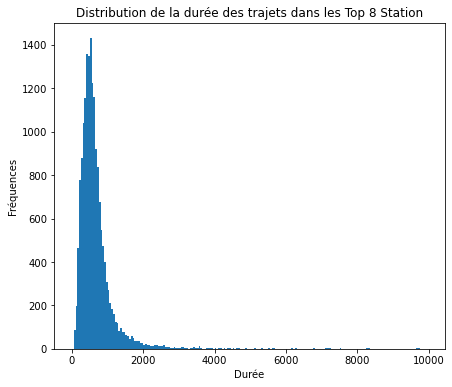

In [44]:
# Distribution de la durée des trajets dans les Top 8 Station
plt.figure(figsize=(7,6))
#bins = np.arange(0, df_top8_le100['duration_sec'].max()+50, 100)
bins = np.arange(0, 10000, 50)
plt.hist(data=df_top8, x='duration_sec', bins=bins)
plt.xlabel('Durée')
plt.ylabel('Fréquences')
plt.title('Distribution de la durée des trajets dans les Top 8 Station');

**Commentaire**: On vois clairement dans ce cas de figure précis que la durée n'est par distribuée normalement 

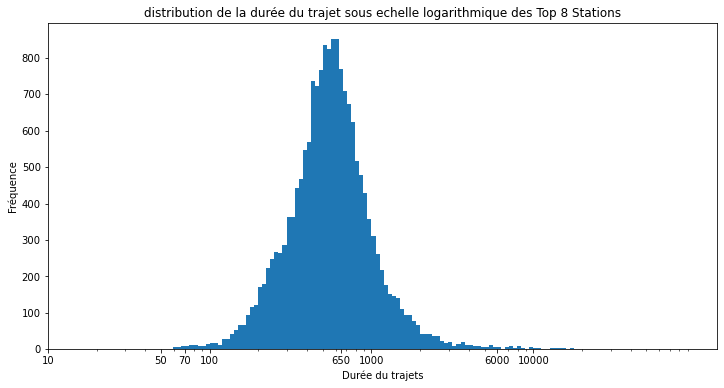

In [45]:
# On remarque plus haut qu'il y'a une longue traine dans la distribution donc metton sous echelle avec logarithme
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(df_top8['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 6])
plt.hist(data = df_top8, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10,50,70,100,650,1000,6000,10000], [10,50,70,100,650,1000,6000,10000])
plt.xlabel('Durée du trajets')
plt.ylabel('Fréquence')
plt.title('distribution de la durée du trajet sous echelle logarithmique des Top 8 Stations');

**Commentaire**: D’après la figure, la plupart des durées de trajets tombent en 650 secondes (10,8 minutes). Il semble suivre la distribution de la loi normale.

### Discutez de la ou des distributions de vos variables d’intérêt. Y a-t-il eu des points inhabituels? Avez-vous eu besoin d’effectuer des transformations ?

> Nous avons eu a transformer les varibles age et Duration_sec en leur applicant une transformation logarithmique parce que à la première visualisation, on a vu que leur distribution était asymétrique. Après transformation de l'age, on remarque un grand pique entre la tranche d'age de 30 à 40 ans.  Pour ce qui en est de la varibles Duration_sec, on remaque un grand pique entre 500 et 700 secondes.

### Parmi les caractéristiques que vous avez étudiées, y a-t-il eu des distributions inhabituelles? Avez-vous effectué des opérations sur les données pour ranger, ajuster ou modifier la forme des données ? Si oui, pourquoi avez-vous fait cela?

>  Etant donné que nous avons plus de 300 station de départs, Nous avons trié 8 meilleurs stations dans lesquelles les trajest sont le plus éffectuées. il s'agit des stations suivantes:
Market St at 10th St                                         
San Francisco Caltrain Station 2  (Townsend St at 4th St)    
Berry St at 4th St                                           
San Francisco Ferry Building (Harry Bridges Plaza)           
Montgomery St BART Station (Market St at 2nd St)             
San Francisco Caltrain (Townsend St at 4th St)               
Powell St BART Station (Market St at 4th St) et The Embarcadero at Sansome St

> LA boite à moustache sur la varible age montre des valeurs abérntes c'est a dire il y a des gens qui ont plus de 100 mais nous allons le garder comme cela dans notre analyse

> Pour les autres type de sexe même s'ils représentent un faible pourcentages des riders, nous allons quand même les garder dasn notre analyse.


<a id='mult'></a>
##  Exploration Bivariée

> Dans cette section, nous allons voir les diférentes relation qui existent entre nos variables d'intérêt que nous vons évoqués plus haut, nous allons étudier leur corrélation également.

In [46]:
# Preparation des listes des variables numériques et catégorielles
numeric_vars = ['age','duration_sec']
times_chr = ['période_jour','debut_semaine_char']
users_chr = ['user_type','member_gender']

In [47]:
# Nous allons ordonner les stations qui ont le plus de trajets en ordre décroissant
loc_cl = locs = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','Berry St at 4th St','Powell St BART Station (Market St at 4th St)']
loc_cl2 = pd.api.types.CategoricalDtype(ordered=True, categories=loc_cl)
df_top8['start_station_name'] = df_top8['start_station_name'].astype(loc_cl2)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14396\2200717383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top8['start_station_name'] = df_top8['start_station_name'].astype(loc_cl2)


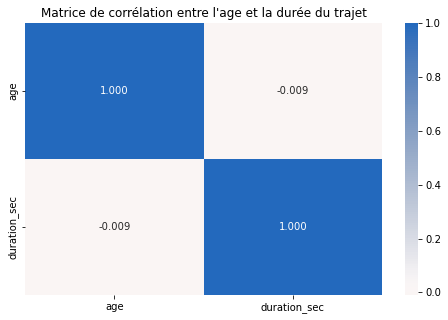

In [48]:
# 1. Voyons la corrélation entre la varible age et Duration_sec
plt.figure(figsize = [8, 5])
sb.heatmap(df_top8[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Matrice de corrélation entre l\'age et la durée du trajet');

**Commentaire**: Nous pouvons voir que le cofficient de corrélation entre l'age et la durée du trajet est négative et très faiblece qui veut dire que 

df_top8.shape= (17608, 15)
df_top8_samp.shape= (500, 15)


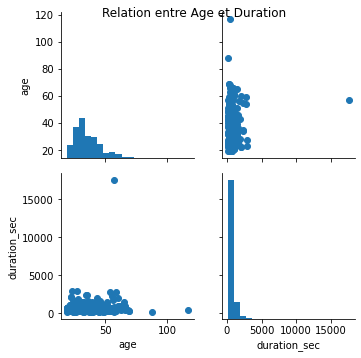

In [49]:
# corrélation entre la var age et durée du trajet
print("df_top8.shape=",df_top8.shape)
df_top8_samp = df_top8.sample(n=500, replace = False)
print("df_top8_samp.shape=",df_top8_samp.shape)

g = sb.PairGrid(data = df_top8_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
g.fig.suptitle('Relation entre Age et Duration');

**Commentaire**: Avec ces graphiques, nous pouvons confirmer encore une fois que il n'y pas de corrélation entre l'age et la durée du trajet

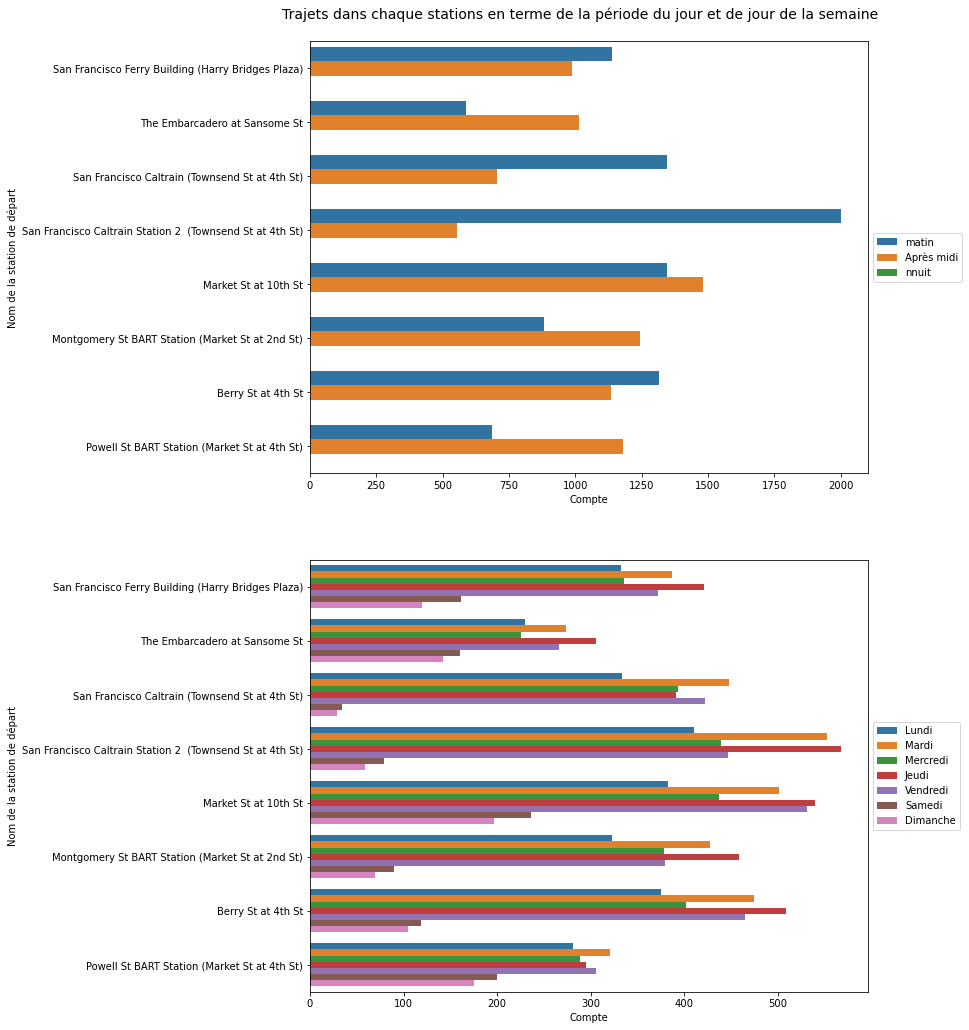

In [50]:
#Traçage des variables catégorièlles : Nombre de trajets en terme de la période du jour et de jour de la semaine 
# dans les 8 meilleures stations
fig = plt.figure(figsize=(10,16))
plt.subplots_adjust(top=0.95)
fig.suptitle('Trajets dans chaque stations en terme de la période du jour et de jour de la semaine', fontsize=14)
for i in range(1, 3):
    ax = fig.add_subplot(2, 1, i)
    sb.countplot(data=df_top8, y='start_station_name', hue=times_chr[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Nom de la station de départ')
    plt.xlabel('Compte');

**Commentaire**: 
- Premièrement nous pouvons voir que par exemple dans la station de 
    "San Francisco Caltrain Station 2 (Townsend St at 4th St)" la plus par des débuts de trajets sont reélisée le matin
- Deuxiènement, On vois que dans la plus part des stations, le Jeudi, Mardi et vendredi sont les jour 
    sur les quels les trajets sont le plus effectuées

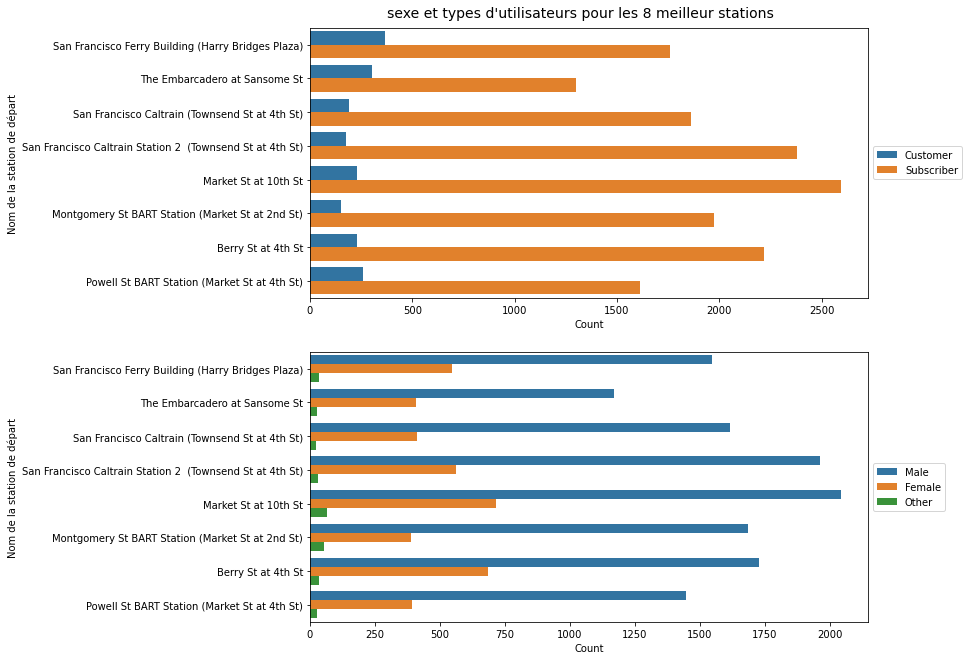

In [51]:
# Diagramme en batôn du sexe et du types d'utilisateurs pour les 8 meilleur stations
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top=0.95)
fig.suptitle('sexe et types d\'utilisateurs pour les 8 meilleur stations' , fontsize=14)
for i in range(1, 3):
    ax = fig.add_subplot(2, 1, i)
    sb.countplot(data=df_top8, y='start_station_name', hue=users_chr[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Nom de la station de départ')
    plt.xlabel('Count');

**Commentaire**: 
  - Dans le premier graphique nous voyons que les abonné sont plus nombreux que les clients quelque soit la station
   - Dans un second temps, On vois que le sexe masculin est la plus grande partie des riders

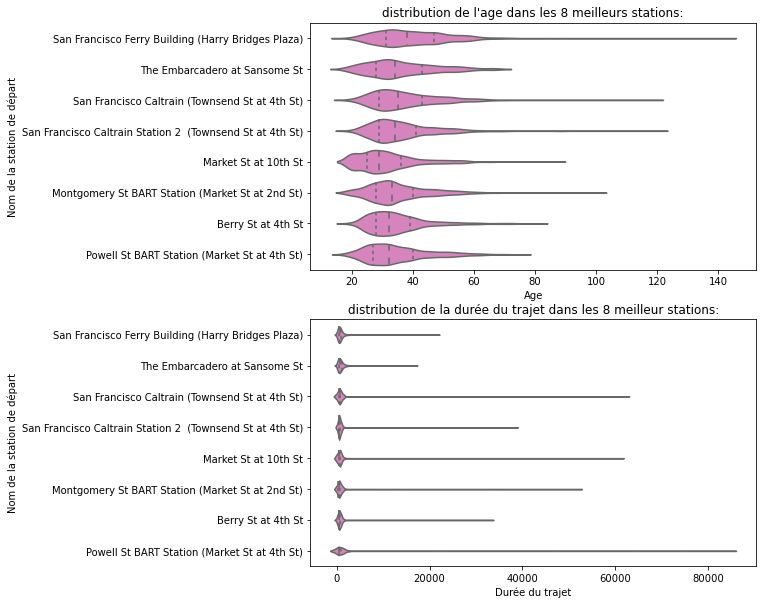

In [52]:
#  Diagramme en violon pour voir la distribution de l'age de la durée du trajet dans les 8 meilleur stations: 
plt.figure(figsize=(8,10))
base_color = sb.color_palette()[6]
ax = plt.subplot(211)
sb.violinplot(data=df_top8, y='start_station_name', x='age', inner='quartile', color=base_color)
plt.xlabel('Age')
plt.ylabel('Nom de la station de départ')
plt.title('distribution de l\'age dans les 8 meilleurs stations:')

ax = plt.subplot(212)
sb.violinplot(data=df_top8, y='start_station_name', x='duration_sec', inner='quartile',color=base_color)
plt.xlabel('Durée du trajet')
plt.ylabel('Nom de la station de départ')
plt.title('distribution de la durée du trajet dans les 8 meilleur stations:');

**Commentaire**: 
-  Ici nous voyons que l'age est largement distribuée de 20 à 40 ans ce qui ne reflete pas la réalité
- La durée du trajet du trajet quant à elle est distribuée au trour de 0

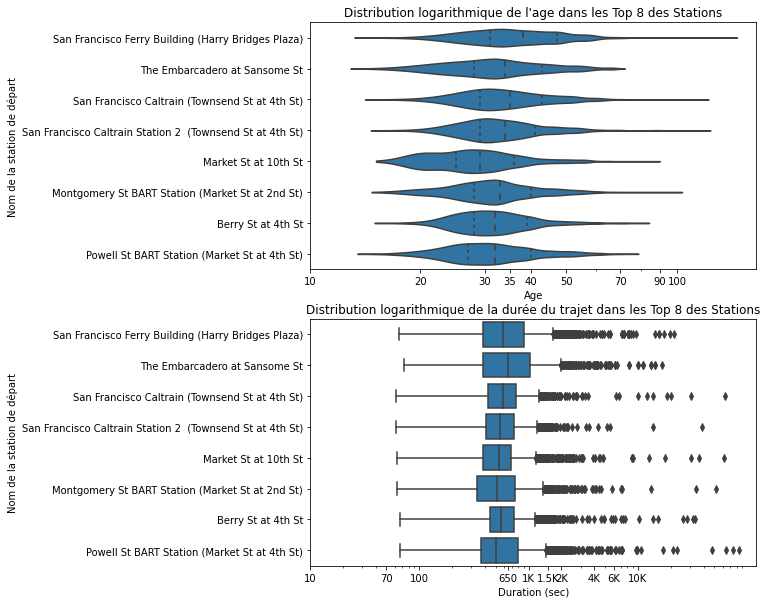

In [53]:
# It looks like the majority of data squeeze in the first half of plots. Let's see log transform.
# For duration of trips: avoid messiness of violin plots, I plot boxplots instead.
plt.figure(figsize=(8,10))
base_color = sb.color_palette()[0]
ax = plt.subplot(211)
sb.violinplot(data=df_top8, y='start_station_name', x='age', inner='quartile', color=base_color)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100])
plt.ylabel('Nom de la station de départ')
plt.xlabel('Age')
plt.title('Distribution logarithmique de l\'age dans les Top 8 des Stations')

ax = plt.subplot(212)
sb.boxplot(data=df_top8, y='start_station_name', x='duration_sec',color=base_color)
plt.xscale('log')
plt.xticks([10,50,100,650,1000,1500,2000,4000,6000,10000], [10,70,100,650,'1K','1.5K','2K','4K','6K','10K'])
plt.xlabel('Duration (sec)')
plt.ylabel('Nom de la station de départ')
plt.title('Distribution logarithmique de la durée du trajet dans les Top 8 des Stations');

**Commantaire**:
- Après transformation logarithmique, la valeur médiane de l'age se situe entre 30 et 40 ans
- La durée du trajet quand à elle, la valeur médiane se situe entre 550 et 650 secondes

In [54]:
# Check high outliers in duration of trips
len(df_top8.query('duration_sec > 1500')['duration_sec'])/len(df_top8['duration_sec'])

0.05134029986369832

**Commentaire**: Nous consatons un pourcentage assez faible des valeurs manquantes qui représente environ 5,1% 

### Relations que nous avons observés au cours de cette partie de l'analyse.

> Nous avons vu au cours de cette analyse que :
- Après avoir reparti les 8 meilleurs stations, nous avons vu que ça soit le matin ou le soir, les gens font des trajet autant de fois dans ces stations.
- Nous avons constater aussi que les gens font plus de trajet les jours de la semaine que le weekends dans nos 8 meilleurs stations en revance certaines stations comme Market St at 10th St et Powell St BART (Market St at 4th St) ont plus de trajet les weekends que les autres stations.
- La plus part des gens qui utilise le vélo sont les gens agés de 30 à 40 ans ce peut se traduire par le fait que cette tranche d'age soit comprise dans la tranche d'age de la population active.
- On vois également que il y a plus d'hommes que de femmes qui font de trajets
- On a plus de clients que d'abonnés

### Les relations intérressantes que nous avons observés entres les autres caractéristiques:

> Les relations intéressantes que nous avons observées sont :
- L'age et la durée du trajet sont faiblement corrélés négativement alors que l'age de la majorité des riders est situé entre 30 et 40 ans.

<a id='next'></a>
##  Exploration Multivariée

> Dans cette section, nous allons créer des graphiques tridimentionneles afin de voir les relations entre nos variables d'intérêts qu'on ne voyais pas dans notre exploration mutivariée et univariée.

In [55]:
# Dans nos 8 meilleurs station, nous allons séparer les clients des abonnées
df_cust = df_top8.query('user_type == "Customer"')
df_sub = df_top8.query('user_type == "Subscriber"')

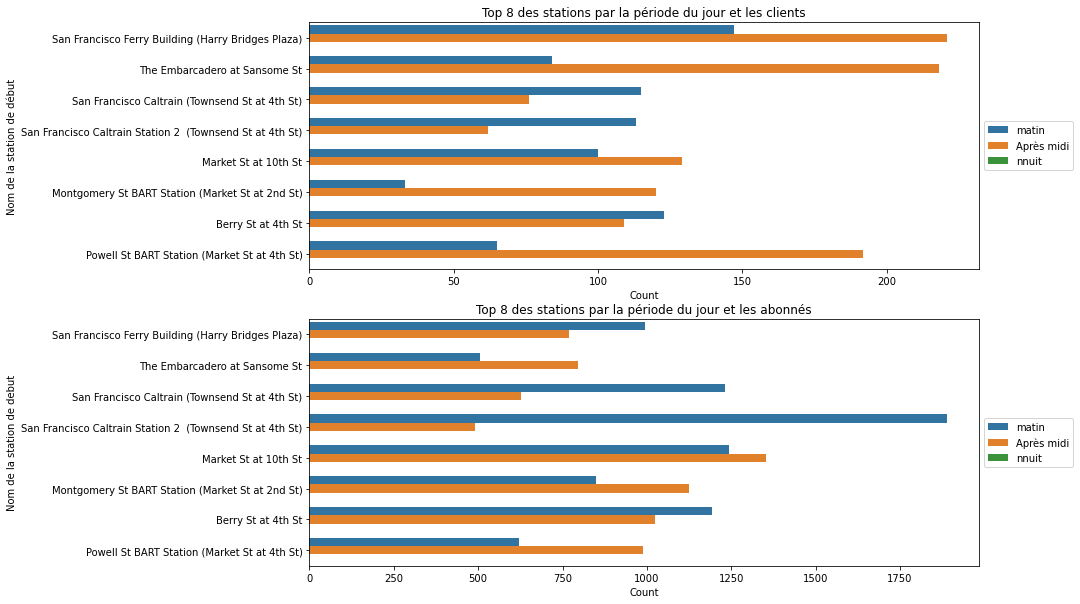

In [56]:
# Diagramme en baton pour la période jour: matin, Soir et la nuit entre les clients et les abonnés
plt.figure(figsize=(12,10))
ax = plt.subplot(211)
sb.countplot(data=df_cust, y='start_station_name', hue='période_jour')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 des stations par la période du jour et les clients')
plt.xlabel('Count')
plt.ylabel('Nom de la station de début')

ax = plt.subplot(212)
sb.countplot(data=df_sub, y='start_station_name', hue='période_jour')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 des stations par la période du jour et les abonnés')
plt.xlabel('Count')
plt.ylabel('Nom de la station de debut');

**Commenataire**: 
- On vois de part ces graphiques que les clients font plus de trajet les après midi que la matinée 
notamment dans les Stations: San Francisco Ferry Bulding(Harry Bridges Plaza), The Embarcadero at Sansome St et 
    Powell St BART Station (Market St at 4th St)
- En outre on vois que pour les abonnés, la plus part des trajets sont fait la matinée par exemple pour la 
station San Francisco Caltrain Station 2 (Townsend St at 4th St).

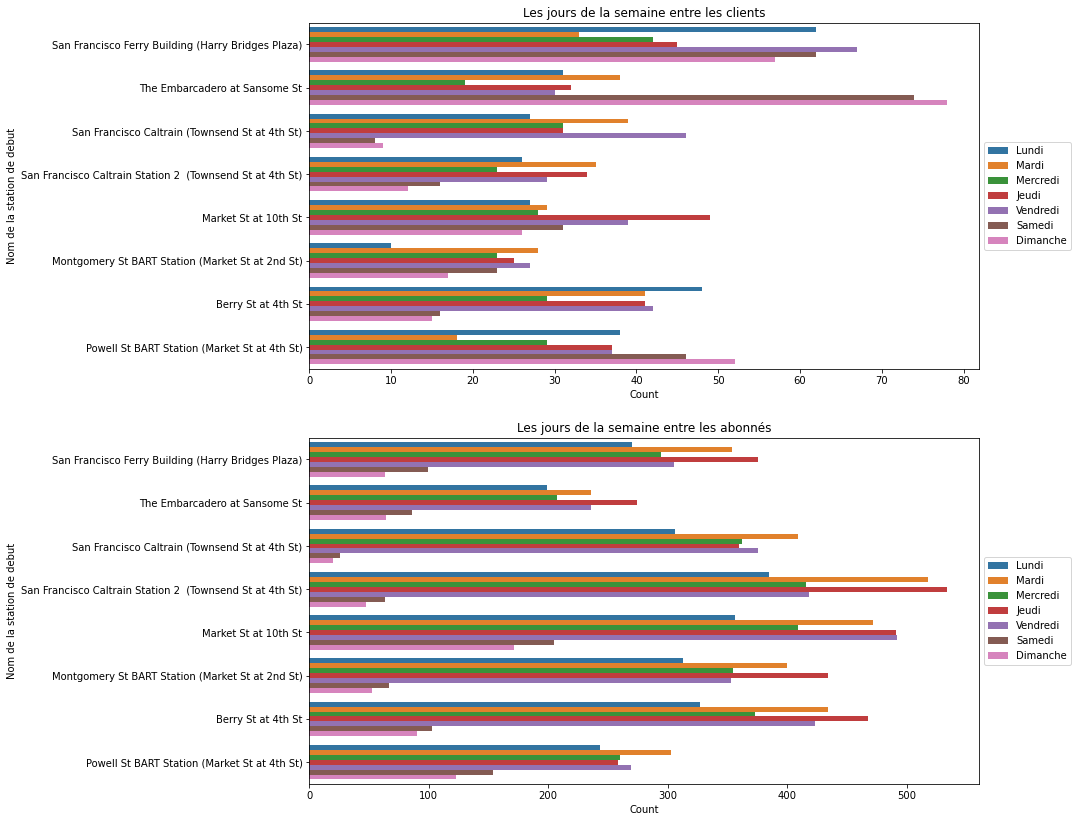

In [57]:
# Les jours de la semaine entre les clients et les abonnés.
plt.figure(figsize=(12,14))
ax = plt.subplot(211)
sb.countplot(data=df_cust, y='start_station_name', hue='debut_semaine_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Les jours de la semaine entre les clients')
plt.ylabel('Nom de la station de debut')
plt.xlabel('Count')

ax = plt.subplot(212)
sb.countplot(data=df_sub, y='start_station_name', hue='debut_semaine_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Les jours de la semaine entre les abonnés')
plt.ylabel('Nom de la station de debut')
plt.xlabel('Count');

**Commantaire**:
- On vois ici que par exemple dans la station The Embarcadero at Sansome St, la plus part des trajet sont faits par les clients
le samédi et le dimanche en outre pour la station San Francisco Ferry Bulding(Harry Bridges Plaza) la plus part
des trajets sont fait le Lundi et le Vendredi
- On vois aussi que pour les abonnées, la plus part des trajets sont fait le Mardi et Jeudi dans les 8 stations. 
Mais il y en a plus de trajet dans la station San Francisco Caltrain Station 2 (Townsend St at 4th St)

In [58]:
# Séparation du genre pour les femme et les hommes
df_f = df_top8.query('member_gender == "Female"')
df_m = df_top8.query('member_gender == "Male"')

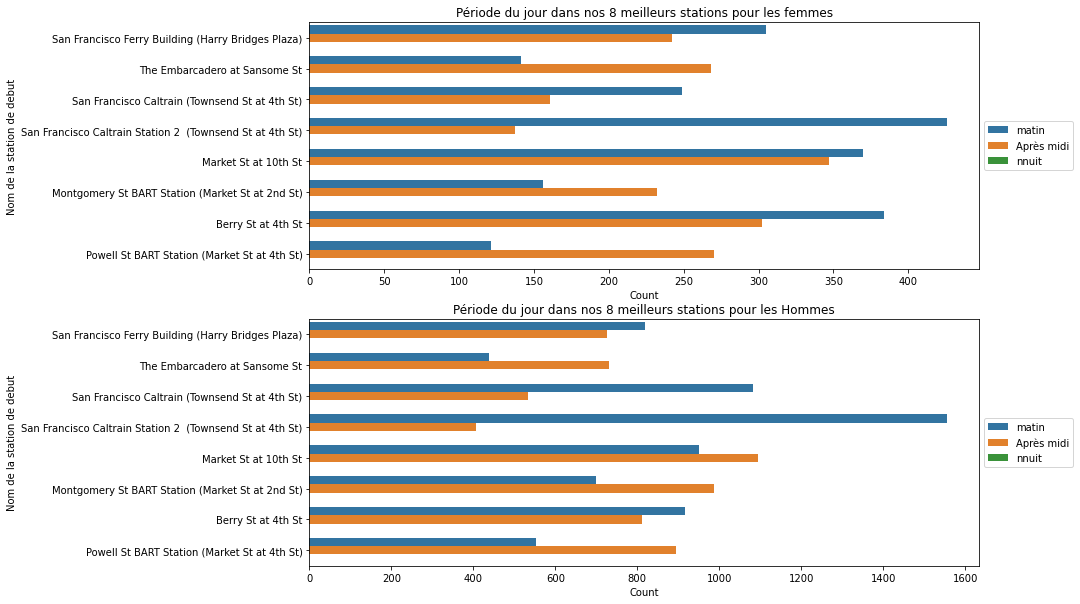

In [59]:
# Période du jour dans nos 8 meilleurs stations par genre de sexe
plt.figure(figsize=(12,10))
ax = plt.subplot(211)
sb.countplot(data=df_f, y='start_station_name', hue='période_jour')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Période du jour dans nos 8 meilleurs stations pour les femmes')
plt.xlabel('Count')
plt.ylabel('Nom de la station de debut')

ax = plt.subplot(212)
sb.countplot(data=df_m, y='start_station_name', hue='période_jour')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Période du jour dans nos 8 meilleurs stations pour les Hommes')
plt.xlabel('Count')
plt.ylabel('Nom de la station de debut');

**Commentaire**:
- On voit que que ça soit les hommes ou les femmes, dans nos 8 meilleur stations les gens font le plus de trajet la matinée 
en particulie dans la station San Francisco Caltrain Station 2 (Townsend St at 4th St)

In [60]:
# Comme les noms des stations sont rop longues, nous allons utiliser leur ID pour les visualisation 
df_top8.groupby('start_station_name')['start_station_id'].value_counts()

start_station_name                                         start_station_id
San Francisco Ferry Building (Harry Bridges Plaza)         15.0                2129
The Embarcadero at Sansome St                              6.0                 1604
San Francisco Caltrain (Townsend St at 4th St)             30.0                2050
San Francisco Caltrain Station 2  (Townsend St at 4th St)  67.0                2556
Market St at 10th St                                       58.0                2825
Montgomery St BART Station (Market St at 2nd St)           21.0                2127
Berry St at 4th St                                         81.0                2450
Powell St BART Station (Market St at 4th St)               3.0                 1867
Name: start_station_id, dtype: int64

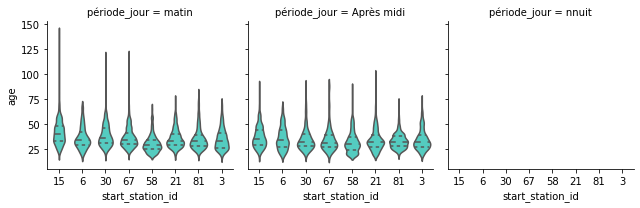

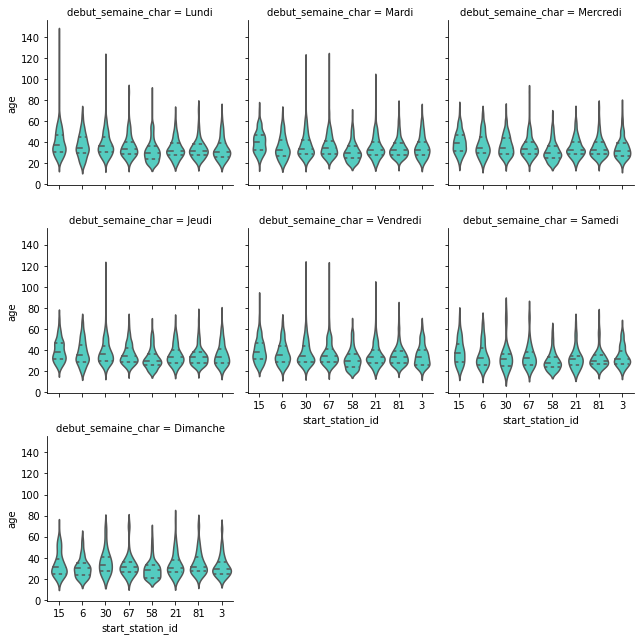

In [61]:
# Ici on a deux variables catégorique et une variables numérique c'est à dire les Top 8 stations, le temps selon l'age
# Donc nous allons les séparer en modalités et utilise les diagramme en violon pour faciliter les interpretations
for i in range(1, 3):
    g = sb.FacetGrid(data=df_top8, col=times_chr[i-1], col_wrap=3)
    g.map(sb.violinplot,'start_station_id', 'age', inner='quartile', order=[15,6,30,67,58,21,81,3], color='turquoise');

**Commentaire**:
- Pour la période du jours, on a une distribution de l'age qui va de 25 à 50 ans dans les 8 meilleurs stations
- Pour les jour de la semaine, la distribution de l'age est assez large neamoins on remarque des valeurs abbérantes 

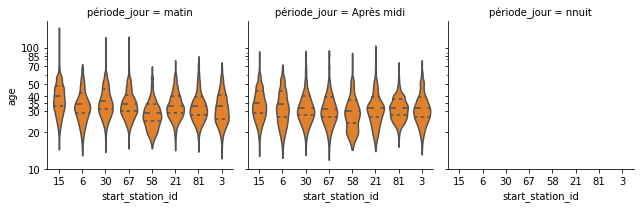

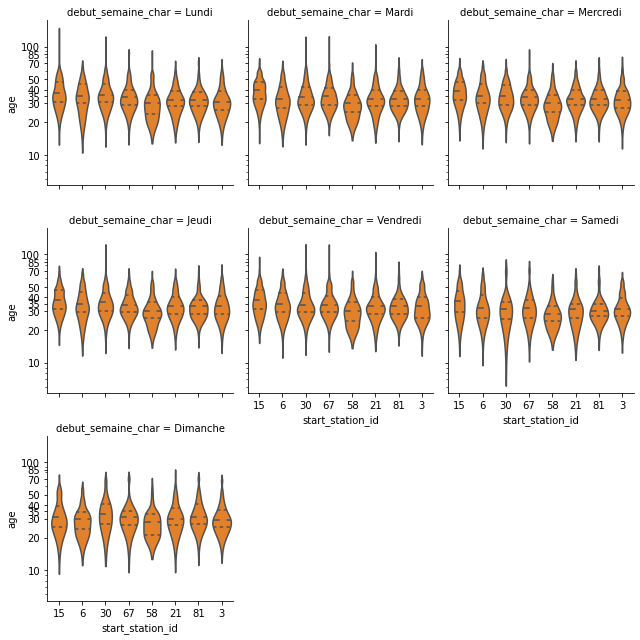

In [62]:
# Faisons une transformation logarithmique de ce qu'on vien de faire précedement
base_color = sb.color_palette()[1]
for i in range(1, 3):
    g = sb.FacetGrid(data=df_top8, col=times_chr[i-1], col_wrap=3)
    g.map(sb.violinplot,'start_station_id', 'age', inner='quartile', order=[15,6,30,67,58,21,81,3], color=base_color)
    plt.yscale('log')
    plt.yticks([10,20,30,35,40,50,70,85,100], [10,20,30,35,40,50,70,85,100]);

**Commantaire**: On peut bien remarque maintenant que ça soit pour la période du jour ou les jour de la semaine, 
    l'age est plutôt bien distribuée

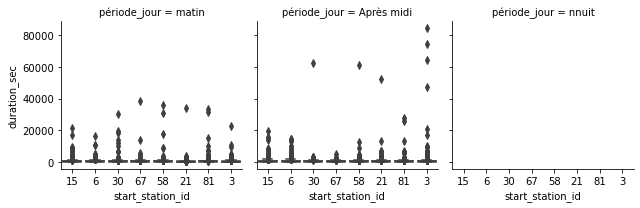

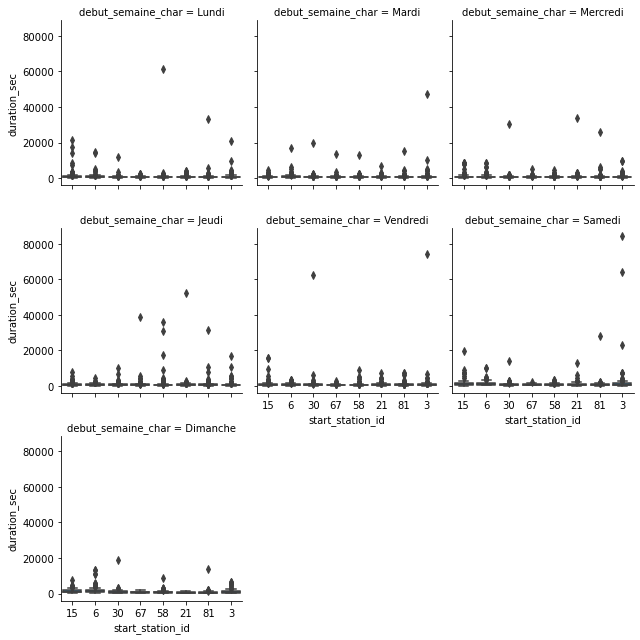

In [63]:
# Ici on a deux variables catégorique et une variables numérique c'est à dire les Top 8 stations, le temps selon la durée 
# du trajet  Donc nous allons les séparer en modalités et utilise les nuages de points pour faciliter les interpretations
base_color = sb.color_palette()[0]
for i in range(1, 3):
    g = sb.FacetGrid(data=df_top8, col=times_chr[i-1], col_wrap=3)
    g.map(sb.boxplot,'start_station_id', 'duration_sec', order=[15,6,30,67,58,21,81,3], color=base_color);

**Commentaire**: On vois que dans l'ensemble, on a une corrélation plutot faible entre la durée du trajet 
et la période du jour. Pour ce qui en est des jours de la semaines, on a à peu près les même observations     

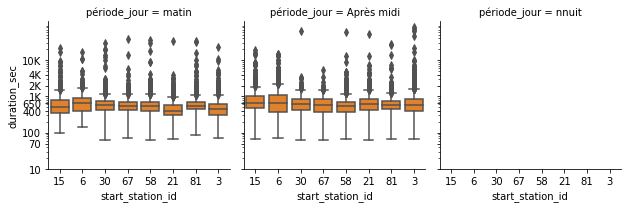

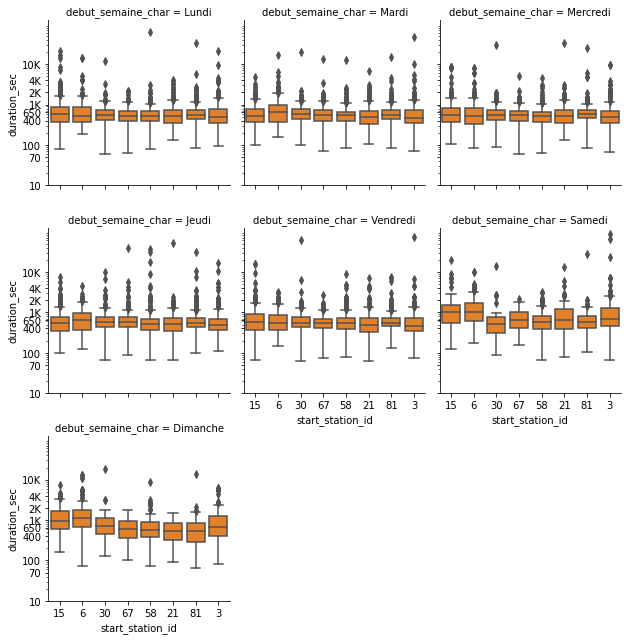

In [64]:
# Faisons maintenant une transformation logarithmique de ce qu'on fait précedement
base_color = sb.color_palette()[1]
for i in range(1, 3):
    g = sb.FacetGrid(data=df_top8, col=times_chr[i-1], col_wrap=3)
    g.map(sb.boxplot,'start_station_id', 'duration_sec', order=[15,6,30,67,58,21,81,3], color=base_color)
    plt.yscale('log')
    plt.yticks([10,50,100,400,650,1000,2000,4000,10000], [10,70,100,400,650,'1K','2K','4K','10K']);

**Commentaire**: On peut remarquer que maintenant les boites à moustaches nous indique qu'il y a une bonne corrélation entre la durée du trajet et la période du jour et les jours de la semaine

### Parlez de certaines des relations que vous avez observées dans cette partie de l’enquête. Y a-t-il eu des caractéristiques qui se sont renforcées mutuellement en termes d’examen de vos caractéristiques d’intérêt?

> Dans cette partie j'ai observé que La séparation des types d’utilisateurs, des clients et des abonnés affiche plus d’informations sur l’emplacement et l’heure. Les clients peuvent être des touristes qui aiment faire du vélo pendant le week-end. En outre, le nombre de voyages augmente dans les attractions touristiques comme le bâtiment du ferry et Embarcadero (près des jetées). D’autre part, les abonnés peuvent être des navetteurs. 
- 

### Y a-t-il eu des interactions intéressantes ou surprenantes entre les fonctionnalités ?

> La surprise que j'ai eu personnellement est que quand j'ai séparé les clients des abonnés dans les 8 meilleurs stations , jai remarquer que la plus part des trajets les matins par les clients alors que la plus part des trajets sont faits les après midi par les abonnés.

<a id='ref'></a>
## Conclusions
>Tout au cours de cette analyse nous avons eu a faire une analyse univariée, Bivariée et multivariée, ces différentes anlyses nous ont permis d'explorerles relations qu'ils y a entre les variables qui porte notre interet. On a eu a expliquer certaine relations mais malheureusment on a pas pu pour d'autre car on est pas allé assez dans les profondeurs pour pouvoir expliquer tous cela.
